In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [21]:
pd.options.display.max_rows = 1500

In [4]:
# Q1
df = pd.read_csv('expenses.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
for i in df.columns:
    print(df[df[i].isnull()])

# There are no null values present 

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [12]:
# Lets check outliers for bmi and charges
# 1. Bmi
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [14]:
# Outlier datapoints
df[(df['bmi'] < lower_limit) | (df['bmi'] > upper_limit)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [15]:
# 2. Charges 
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)

IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [16]:
# Outlier datapoints
df[(df['charges'] < lower_limit) | (df['charges'] > upper_limit)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


<Axes: xlabel='age', ylabel='charges'>

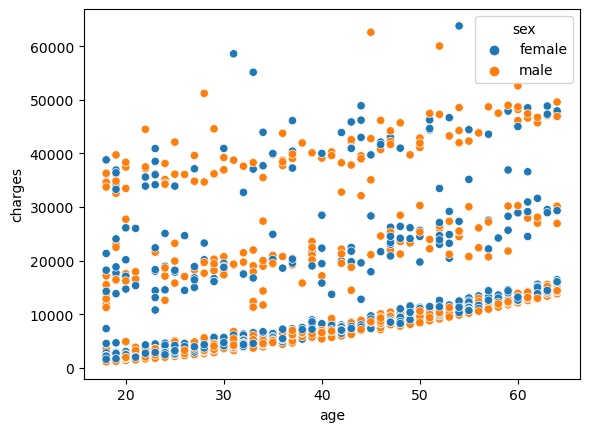

In [37]:
# Basic visualizations 
sns.scatterplot(data = df, x = 'age', y='charges', hue = 'sex')

<Axes: xlabel='bmi', ylabel='age'>

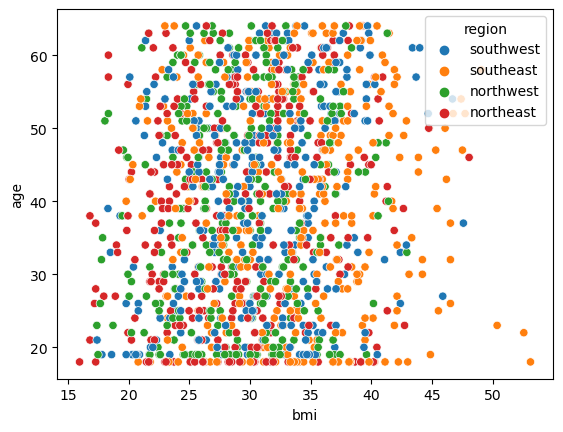

In [39]:
sns.scatterplot(data = df, x = 'bmi', y='age', hue = 'region')

C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_36076\4193189147.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['charges'], bins = 30)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

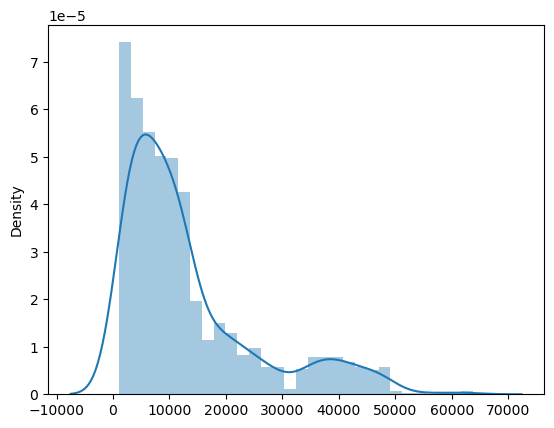

In [41]:
sns.distplot(x = df['charges'], bins = 30)

<Axes: xlabel='children', ylabel='charges'>

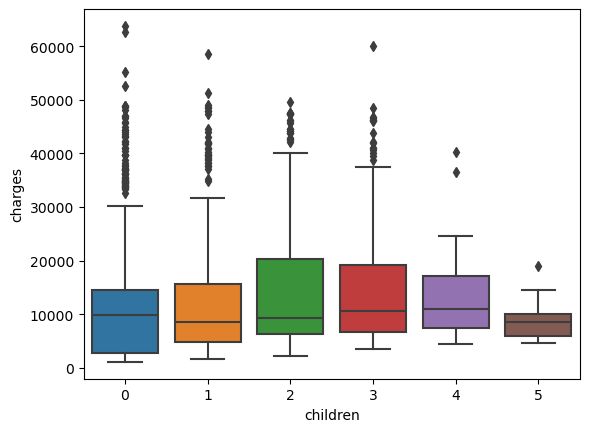

In [42]:
sns.boxplot(data = df, x = 'children', y = 'charges')

In [44]:
df2 = pd.pivot_table(data = df, index = 'age', columns = 'region', values = 'charges', aggfunc = np.mean)

C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_36076\1423830044.py:1: FutureWarning: The provided callable <function mean at 0x0000022E7D807600> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df2 = pd.pivot_table(data = df, index = 'age', columns = 'region', values = 'charges', aggfunc = np.mean)


<Axes: xlabel='region', ylabel='age'>

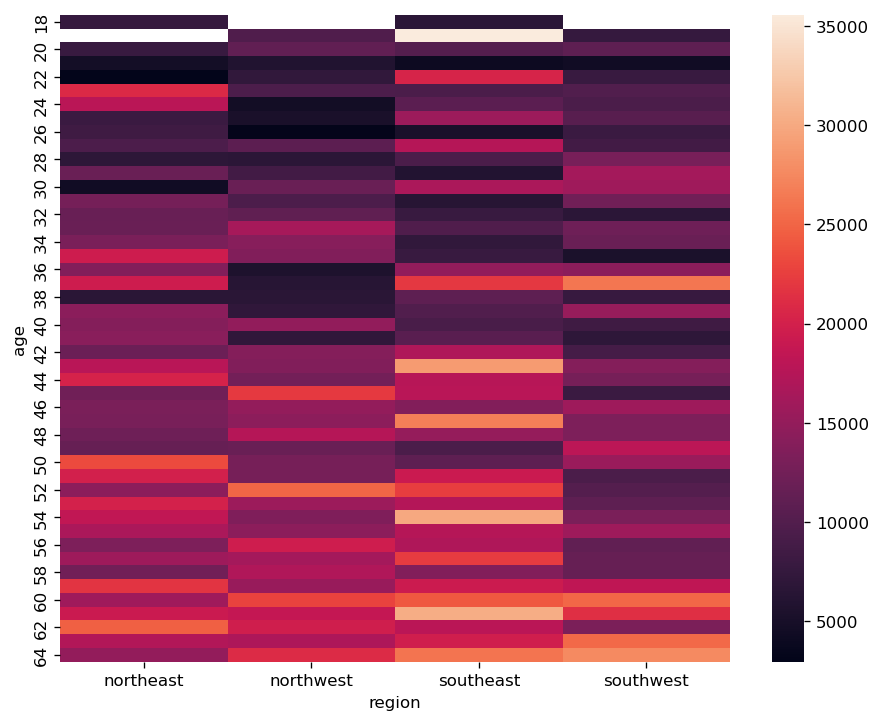

In [50]:
plt.figure(figsize = (9,7), dpi = 120)
sns.heatmap(data = df2)

In [34]:
# Q2. Encoding
# Here we have sex, region and smoker as categorical columns, we can use get_dummies 

df1 = pd.get_dummies(data = df, columns = ['sex','smoker','region'], dtype = int)

In [35]:
df1.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
df.drop_duplicates(inplace = True)
# 1 row is removed 

In [ ]:
# Removing duplicates
df[df.duplicated()]
# there is one duplicate value

In [53]:
X = df1.drop(columns = {'charges'})
y = df1['charges']

In [54]:
# Q4 - Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# Q5
linear = LinearRegression()

In [60]:
linear.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred = linear.predict(X_test)

In [63]:
# Q6
from sklearn.metrics import mean_squared_error,r2_score

In [64]:
mse = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

In [66]:
rmse = np.sqrt(mse)

In [68]:
print('The mean squared error is:',mse)
print('The R square value is:',R2)
print('The root mean squared error is:',rmse)

The mean squared error is: 38940169.92282637
The R square value is: 0.7724363518631283
The root mean squared error is: 6240.2059199057185


In [ ]:
# The convergence criteria is met when a specifc number of iterations is reached or when the lowest error is provided by the model after multiple such iterations 
# In gradient descent, each paramter in the model is updated after each iteration to ensure the reduction in error 